## Depression among people living in rural area


In [1]:
#Importing necessary library for the application
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Reading data from csv file
dep = pd.read_csv('./b_depressed.csv')
dep.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


Variable Description
- Survey_id Individual Identifier
- Ville_id Village Identifier
- sex Gender(0 = Male, 1 = Female)
- Age Age (respondent)
- Married Marital status (0 = Single/Divorced, 1 = Married)
- Number_children Number of children
- total_members Household size
- education_level Years of education completed (respondent)
- depressed Meets epidemiological threshold for moderate depression (0 = not depressed, 1 = depressed)

In [4]:
#dropping column that is not needed/describe/understandable
dep.drop(dep.columns[[0,1]],axis =1, inplace = True)
dep.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [5]:
dep.drop(dep.iloc[:, 6:20],axis =1, inplace = True)
dep.head()

,sex,Age,Married,Number_children,education_level,total_members,depressed
0,1,28,1,4,10,5,0
1,1,23,1,3,8,5,1
2,1,22,1,3,9,5,0
3,1,27,1,2,10,4,0
4,0,59,0,4,10,6,0


In [6]:
#checking null value
dep.isnull().sum()

sex                0
Age                0
Married            0
Number_children    0
education_level    0
total_members      0
depressed          0
dtype: int64

In [7]:
#cleaning the data for readibility
gender_dict = {
    0 : 'M',
    1 : 'F'
}
dep['sex'] = dep['sex'].map(gender_dict)
dep.head()

marriage_status = {
    1 : 'Married',
    0 : 'Single/Divorced'
}
dep['Married'] = dep['Married'].map(marriage_status)
dep.head()

depress_status = {
    0 : 'N',
    1 : 'Y'
}
dep['depressed'] = dep['depressed'].map(depress_status)
dep.head()

,sex,Age,Married,Number_children,education_level,total_members,depressed
0,F,28,Married,4,10,5,N
1,F,23,Married,3,8,5,Y
2,F,22,Married,3,9,5,N
3,F,27,Married,2,10,4,N
4,M,59,Single/Divorced,4,10,6,N


In [8]:
#total number of respondent
len(dep)

1429

<Figure size 1800x432 with 0 Axes>

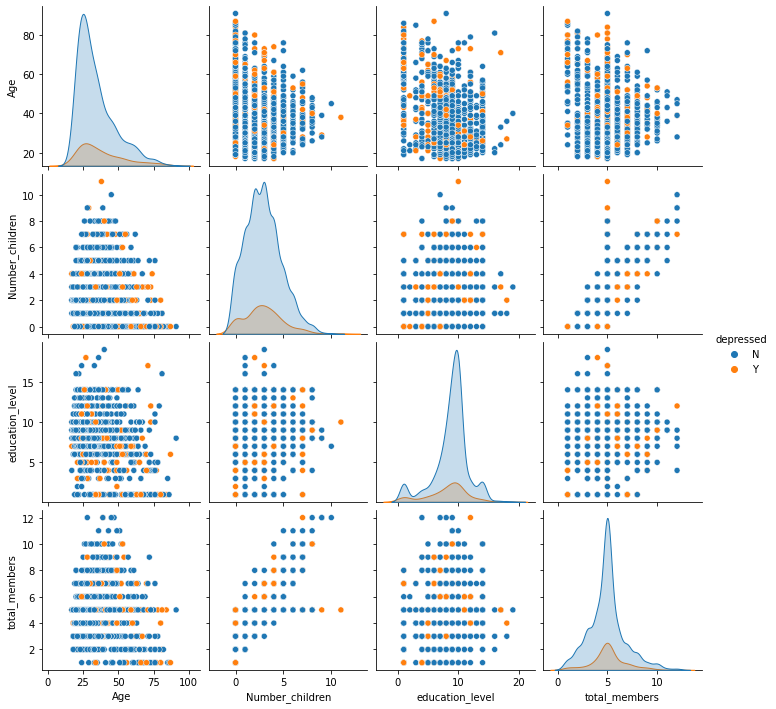

In [109]:
#overview of the dataframe
plt.figure(figsize=(25,6))
sns.pairplot(data=dep,hue='depressed')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

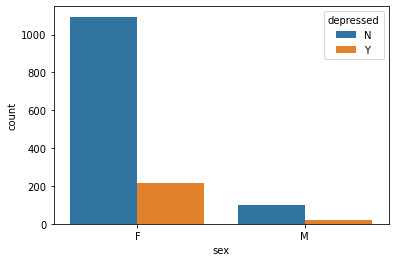

In [9]:
#number of depression between gender
sns.countplot(x='sex', hue='depressed', data=dep)

In [10]:
#percentage of depressed Male vs Female
#Male
100*(len(dep[(dep['sex'] == 'M') & (dep['depressed'] == 'Y')])/len(dep[(dep['sex'] == 'M')]))

17.094017094017094

In [11]:
#Female
100*(len(dep[(dep['sex'] == 'F') & (dep['depressed'] == 'Y')])/len(dep[(dep['sex'] == 'F')]))

16.615853658536587

<AxesSubplot:xlabel='Age', ylabel='count'>

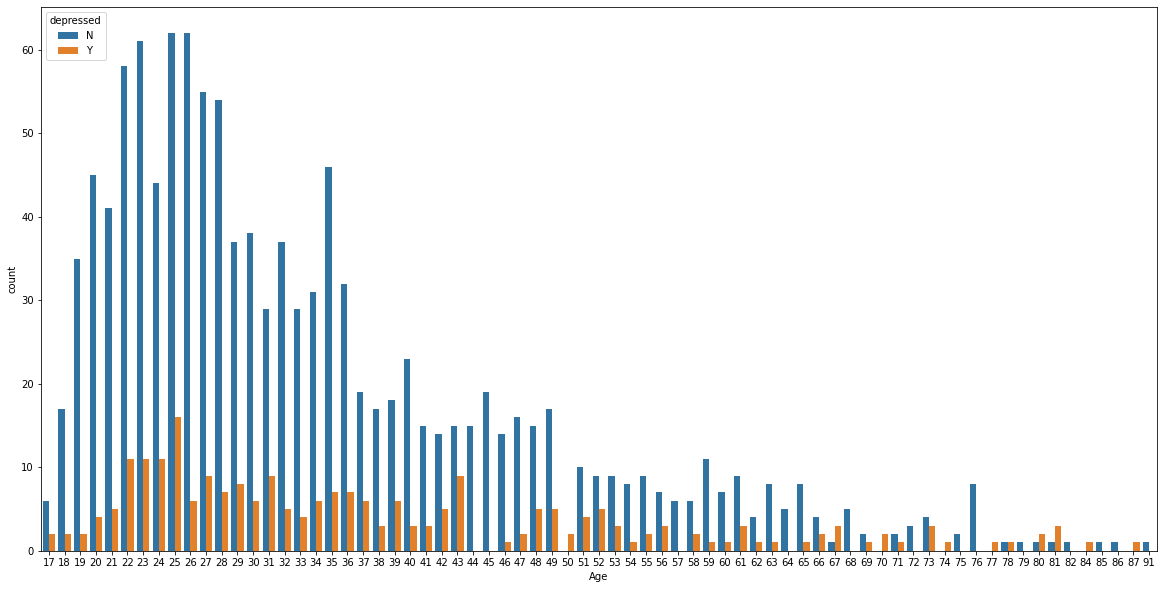

In [16]:
#depression between different ages
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='depressed', data=dep)

In [19]:
#percentage of depression between different age group
below_20 = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'Y') ][['depressed']])
below_30 = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'Y') ][['depressed']])
below_40 = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'Y') ][['depressed']])
below_50 = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'Y') ][['depressed']])
below_60 = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'Y') ][['depressed']])
below_70 = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'Y') ][['depressed']])
below_80 = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'Y') ][['depressed']])
below_90 = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'Y') ][['depressed']])
below_100 = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'Y') ][['depressed']])

In [22]:
below_20n = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'N') ][['depressed']])
below_30n = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'N') ][['depressed']])
below_40n = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'N') ][['depressed']])
below_50n = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'N') ][['depressed']])
below_60n = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'N') ][['depressed']])
below_70n = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'N') ][['depressed']])
below_80n = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'N') ][['depressed']])
below_90n = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'N') ][['depressed']])
below_100n = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'N') ][['depressed']])

In [23]:
age_categ_depress = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20, below_30, below_40,below_50,below_60,below_70,below_80,below_90,below_100]})
age_categ = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20n, below_30n, below_40n,below_50n,below_60n,below_70n,below_80n,below_90n,below_100n]})
a = int(age_categ['Numbers'].sum())
b = int(age_categ_depress['Numbers'].sum())

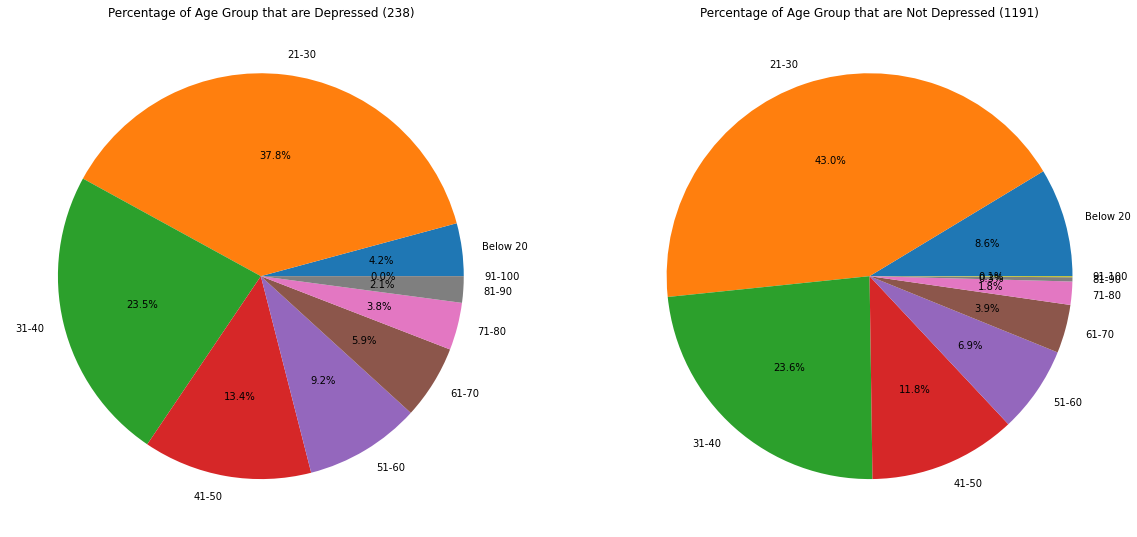

In [24]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.pie(age_categ_depress['Numbers'],labels=age_categ_depress['Group'],autopct='%1.1f%%')
plt.title('Percentage of Age Group that are Depressed ({})'.format(b))

plt.subplot(1,2,2)
plt.pie(age_categ['Numbers'],labels=age_categ['Group'],autopct='%1.1f%%')
plt.title('Percentage of Age Group that are Not Depressed ({})'.format(a))
plt.show()

In [30]:
#percentage of depression between different age group and gender
#female and depress
below_20_F = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_30_F = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_40_F = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_50_F = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_60_F = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_70_F = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_80_F = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_90_F = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_100_F = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
below_20_F

9

In [31]:
#female and not depress
below_20n_F = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_30n_F = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_40n_F = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_50n_F = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_60n_F = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_70n_F = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_80n_F = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_90n_F = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_100n_F = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
below_20n_F

99

In [32]:
#male and depress
below_20_M = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_30_M = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_40_M = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_50_M = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_60_M = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_70_M = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_80_M = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_90_M = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_100_M = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
below_20_M

1

In [33]:
#male and not depress
below_20n_M = len(dep[ (dep['Age'] <= 20) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_30n_M = len(dep[ (dep['Age'] <= 30) & (dep['Age'] > 20) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_40n_M = len(dep[ (dep['Age'] <= 40) & (dep['Age'] > 30) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_50n_M = len(dep[ (dep['Age'] <= 50) & (dep['Age'] > 40) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_60n_M = len(dep[ (dep['Age'] <= 60) & (dep['Age'] > 50) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_70n_M = len(dep[ (dep['Age'] <= 70) & (dep['Age'] > 60) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_80n_M = len(dep[ (dep['Age'] <= 80) & (dep['Age'] > 70) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_90n_M = len(dep[ (dep['Age'] <= 90) & (dep['Age'] > 80) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_100n_M = len(dep[ (dep['Age'] <= 100) & (dep['Age'] > 90) & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
below_20n_M

4

In [35]:
age_categ_depress_F = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20_F, below_30_F, below_40_F,below_50_F,below_60_F,below_70_F,below_80_F,below_90_F,below_100_F]})
age_categ_F = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20n_F, below_30n_F, below_40n_F,below_50n_F,below_60n_F,below_70n_F,below_80n_F,below_90n_F,below_100n_F]})
age_categ_depress_M = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20_M, below_30_M, below_40_M,below_50_M,below_60_M,below_70_M,below_80_M,below_90_M,below_100_M]})
age_categ_M = pd.DataFrame({"Group": ["Below 20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"], "Numbers": [below_20n_M, below_30n_M, below_40n_M,below_50n_M,below_60n_M,below_70n_M,below_80n_M,below_90n_M,below_100n_M]})

In [36]:
a = int(age_categ_depress_F['Numbers'].sum())
b = int(age_categ_F['Numbers'].sum())
c = int(age_categ_depress_M['Numbers'].sum())
d = int(age_categ_M['Numbers'].sum())

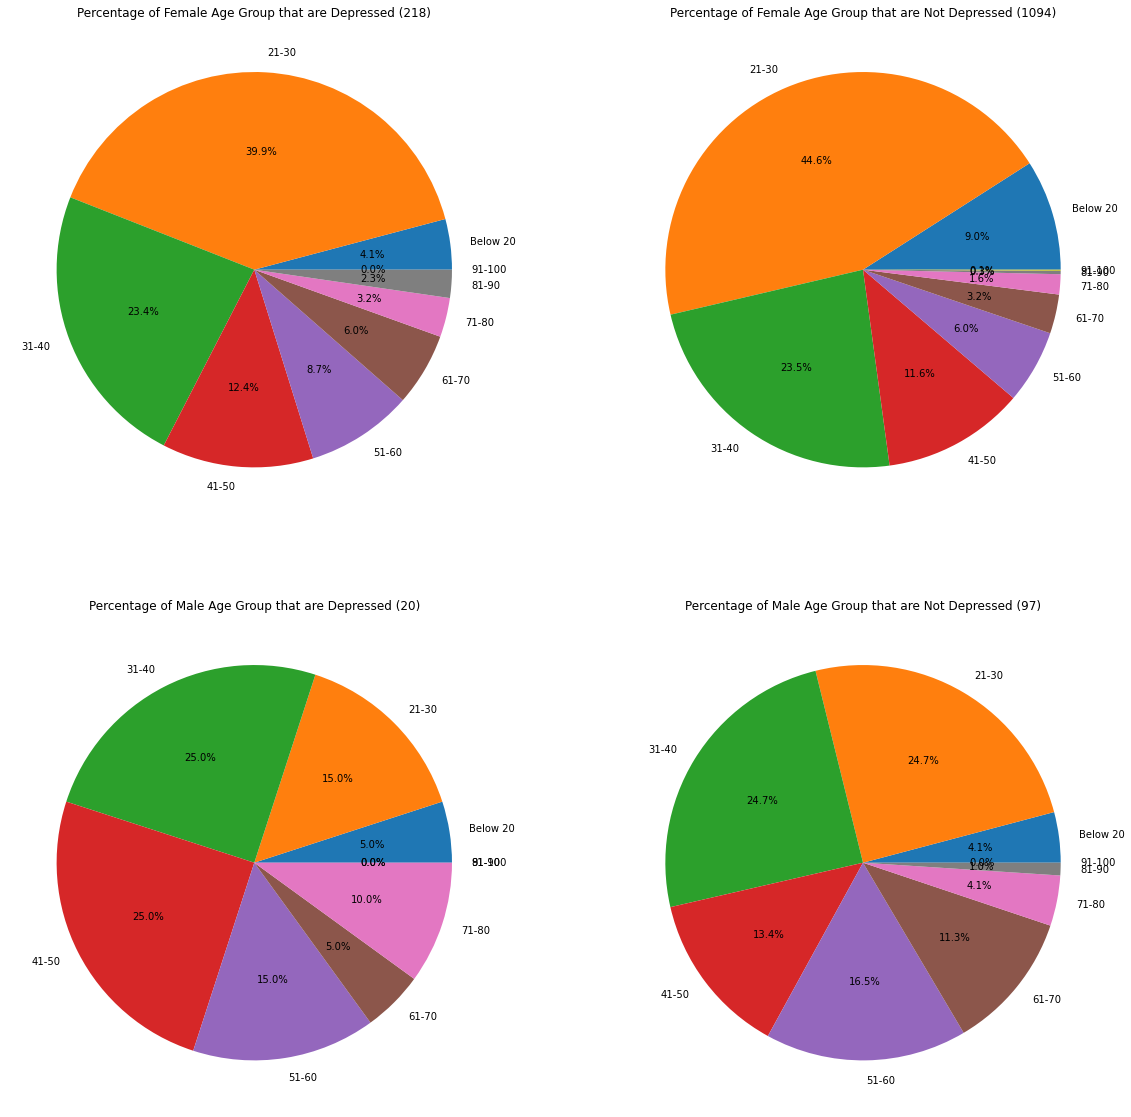

In [37]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
plt.pie(age_categ_depress_F['Numbers'],labels=age_categ_depress_F['Group'],autopct='%1.1f%%')
plt.title('Percentage of Female Age Group that are Depressed ({})'.format(a))

plt.subplot(2,2,2)
plt.pie(age_categ_F['Numbers'],labels=age_categ_F['Group'],autopct='%1.1f%%')
plt.title('Percentage of Female Age Group that are Not Depressed ({})'.format(b))

plt.subplot(2,2,3)
plt.pie(age_categ_depress_M['Numbers'],labels=age_categ_depress_M['Group'],autopct='%1.1f%%')
plt.title('Percentage of Male Age Group that are Depressed ({})'.format(c))

plt.subplot(2,2,4)
plt.pie(age_categ_M['Numbers'],labels=age_categ_M['Group'],autopct='%1.1f%%')
plt.title('Percentage of Male Age Group that are Not Depressed ({})'.format(d))
plt.show()

<AxesSubplot:xlabel='Married', ylabel='count'>

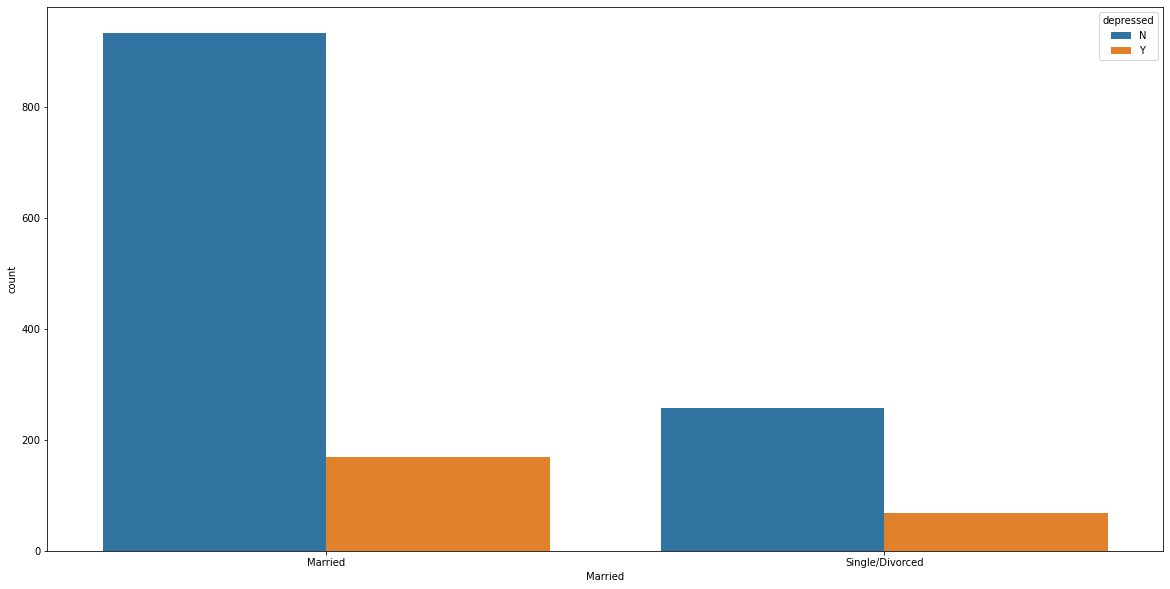

In [38]:
#depression and marriage status
plt.figure(figsize=(20, 10))
sns.countplot(x='Married', hue='depressed', data=dep)

In [39]:
#percentage of depressed Married vs Single/Divorced
#Married
100*(len(dep[(dep['Married'] == 'Married') & (dep['depressed'] == 'Y')])/len(dep[(dep['Married'] == 'Married')]))

15.39855072463768

In [41]:
#Single/Divorced
100*(len(dep[(dep['Married'] == 'Single/Divorced') & (dep['depressed'] == 'Y')])/len(dep[(dep['Married'] == 'Single/Divorced')]))

20.923076923076923

In [42]:
#Percentage of Marriage status and gender
marry_depress_m = len(dep[ (dep['Married'] == 'Married') & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
marry_depress_f = len(dep[ (dep['Married'] == 'Married') & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
marry_ndepress_m = len(dep[ (dep['Married'] == 'Married') & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
marry_ndepress_f = len(dep[ (dep['Married'] == 'Married') & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
marry_depress_f

161

In [49]:
single_depress_m = len(dep[ (dep['Married'] == 'Single/Divorced') & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
single_depress_f = len(dep[ (dep['Married'] == 'Single/Divorced') & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
single_ndepress_m = len(dep[ (dep['Married'] == 'Single/Divorced') & (dep['depressed'] == 'N') & (dep['sex'] == 'M') ][['depressed']])
single_ndepress_f = len(dep[ (dep['Married'] == 'Single/Divorced') & (dep['depressed'] == 'N') & (dep['sex'] == 'F') ][['depressed']])
single_depress_f

57

In [80]:
marry_status = pd.DataFrame({"Group": ["Male, Married and Depressed", "Female, Married and Depressed", "Male, Married and Not Depressed","Female, Married and Not Depressed"], "Numbers": [marry_depress_m, marry_depress_f, marry_ndepress_m,marry_ndepress_f]})
single_status = pd.DataFrame({"Group": ["Male, Single/Divorced and Depressed", "Female, Single/Divorced and Depressed", "Male, Single/Divorced and Not Depressed","Female, Single/Divorced and Not Depressed"], "Numbers": [single_depress_m, single_depress_f, single_ndepress_m,single_ndepress_f]})
e = int(marry_status['Numbers'].sum())
f = int(single_status['Numbers'].sum())

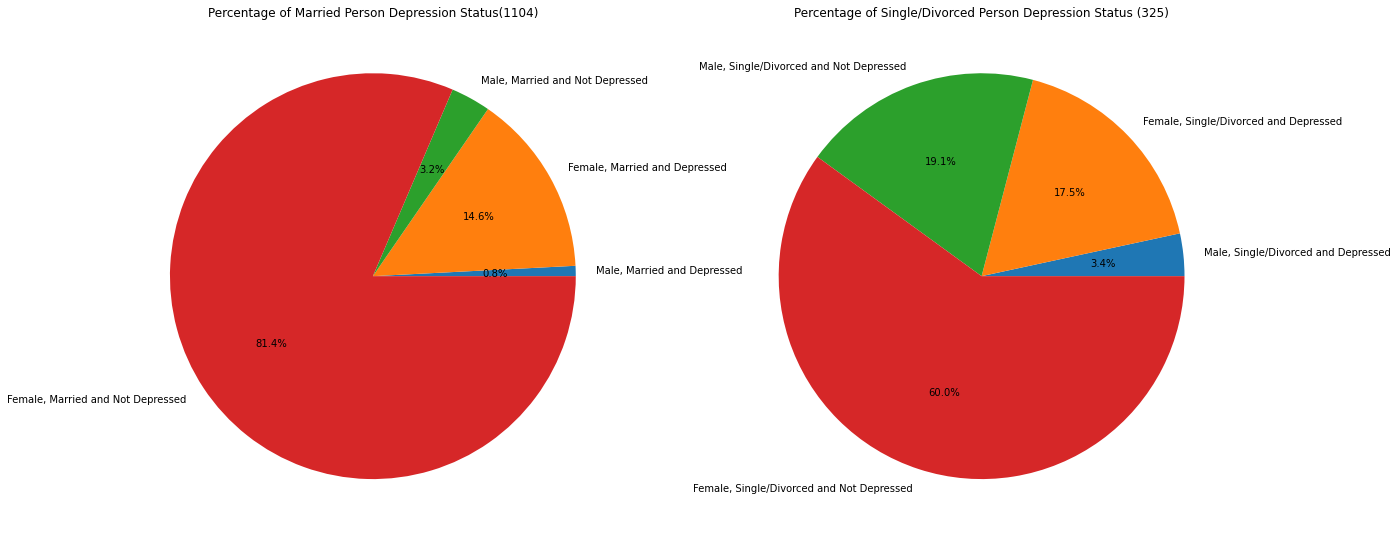

In [81]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.pie(marry_status['Numbers'],labels=marry_status['Group'],autopct='%1.1f%%')
plt.title('Percentage of Married Person Depression Status({})'.format(e))

plt.subplot(1,2,2)
plt.pie(single_status['Numbers'],labels=single_status['Group'],autopct='%1.1f%%')
plt.title('Percentage of Single/Divorced Person Depression Status ({})'.format(f))

plt.show()

<AxesSubplot:xlabel='Number_children', ylabel='count'>

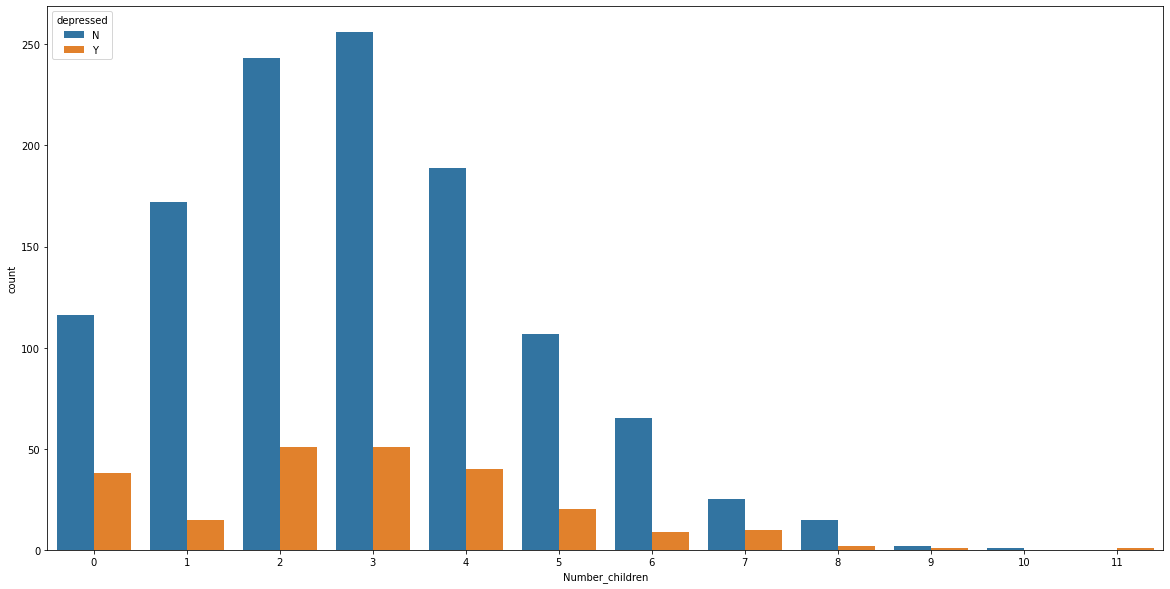

In [53]:
#depression and number of children status
plt.figure(figsize=(20, 10))
sns.countplot(x='Number_children', hue='depressed', data=dep)

In [76]:
#percentage of depressed across the number of children
percentage = []
for i in range(12):
    percentage.append(100*(len(dep[(dep['Number_children'] == i) & (dep['depressed'] == 'Y')])/len(dep[(dep['Number_children'] == i)])))

number = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven']

percentage_dict = zip(number, percentage)
dict(percentage_dict)

{'zero': 24.675324675324674,
 'one': 8.02139037433155,
 'two': 17.346938775510203,
 'three': 16.612377850162865,
 'four': 17.46724890829694,
 'five': 15.748031496062993,
 'six': 12.162162162162163,
 'seven': 28.57142857142857,
 'eight': 11.76470588235294,
 'nine': 33.33333333333333,
 'ten': 0.0,
 'eleven': 100.0}

<AxesSubplot:xlabel='Number_children', ylabel='count'>

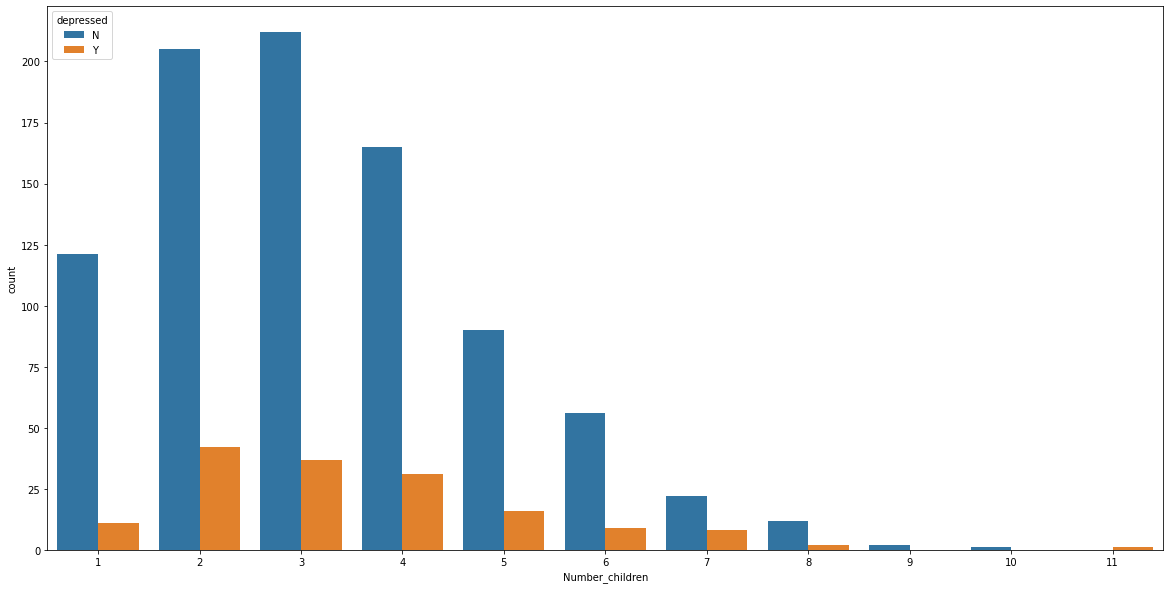

In [83]:
#marriage status vs number of children
married_have_children = dep[(dep['Married'] == 'Married') & (dep['Number_children'] > 0)]
married_have_children
plt.figure(figsize=(20, 10))
sns.countplot(x='Number_children', hue='depressed', data=married_have_children)

<AxesSubplot:xlabel='Number_children', ylabel='count'>

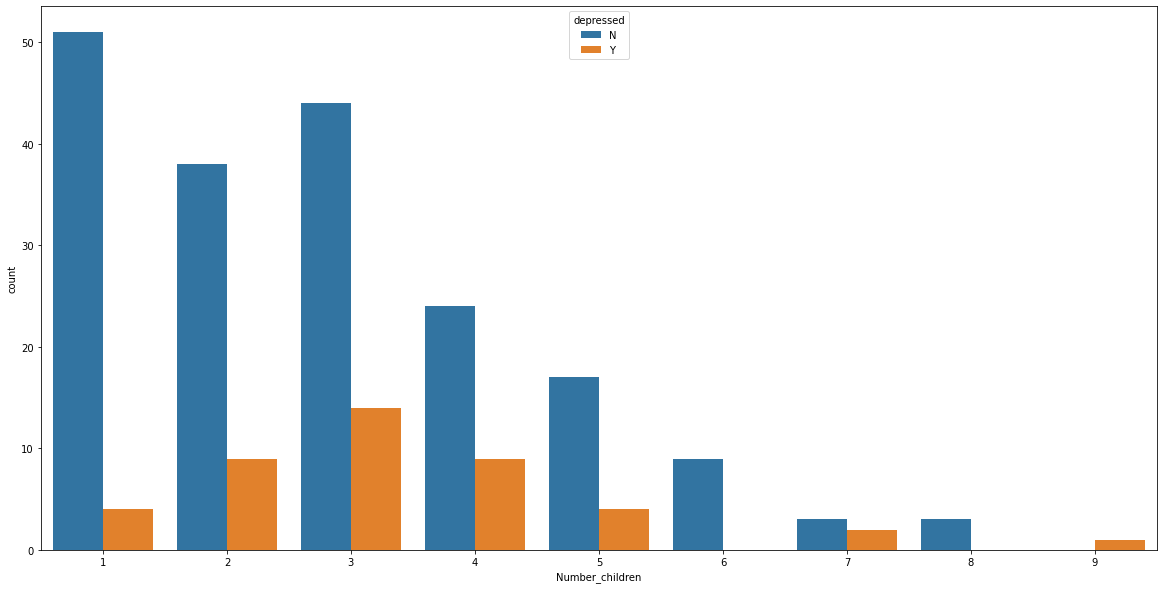

In [84]:
divorced_have_children = dep[(dep['Married'] == 'Single/Divorced') & (dep['Number_children'] > 0)]
divorced_have_children
plt.figure(figsize=(20, 10))
sns.countplot(x='Number_children', hue='depressed', data=divorced_have_children)

<AxesSubplot:xlabel='Number_children', ylabel='count'>

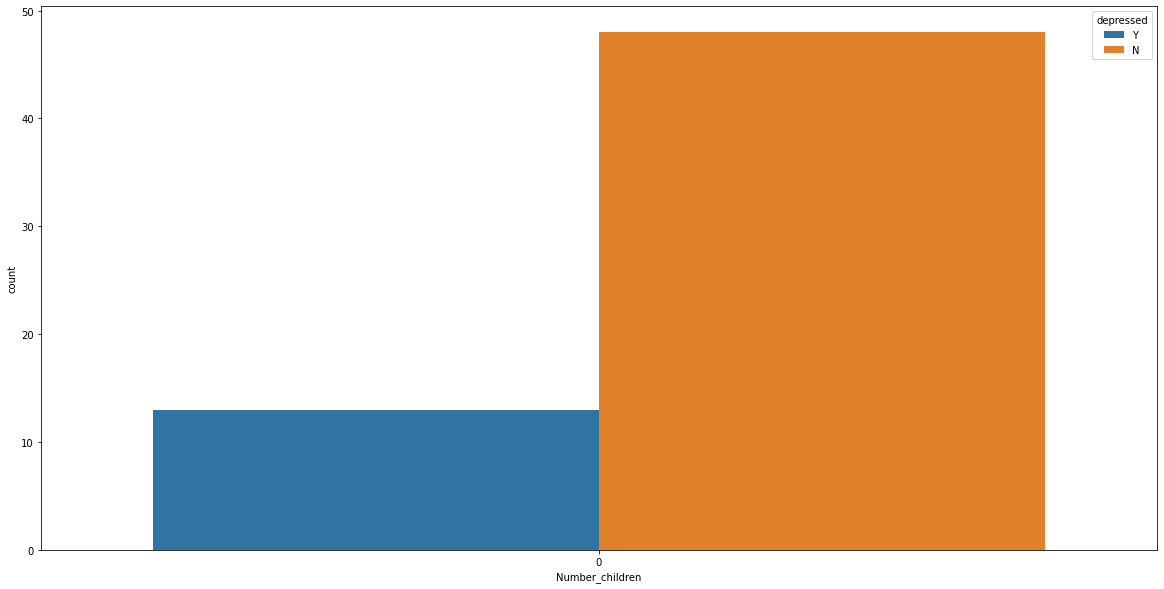

In [87]:
divorced_no_children = dep[(dep['Married'] == 'Married') & (dep['Number_children'] == 0)]
divorced_no_children
plt.figure(figsize=(20, 10))
sns.countplot(x='Number_children', hue='depressed', data=divorced_no_children)

<AxesSubplot:xlabel='Number_children', ylabel='count'>

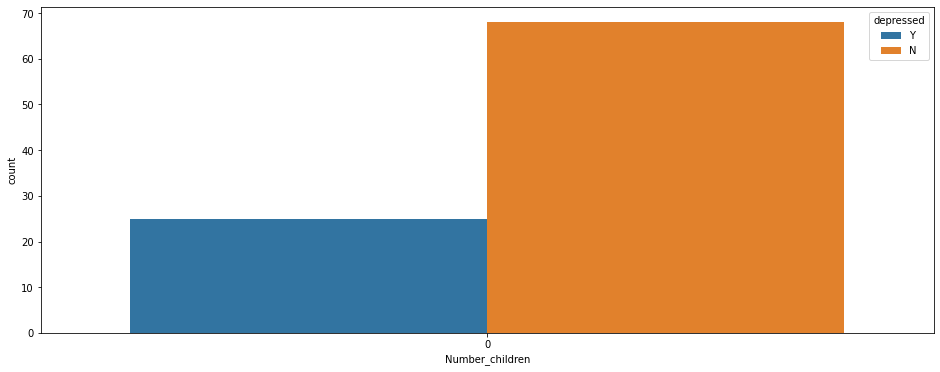

In [82]:
divorced_no_children = dep[(dep['Married'] == 'Single/Divorced') & (dep['Number_children'] == 0)]
divorced_no_children
plt.figure(figsize=(20, 10))
sns.countplot(x='Number_children', hue='depressed', data=divorced_no_children)

<AxesSubplot:xlabel='education_level', ylabel='count'>

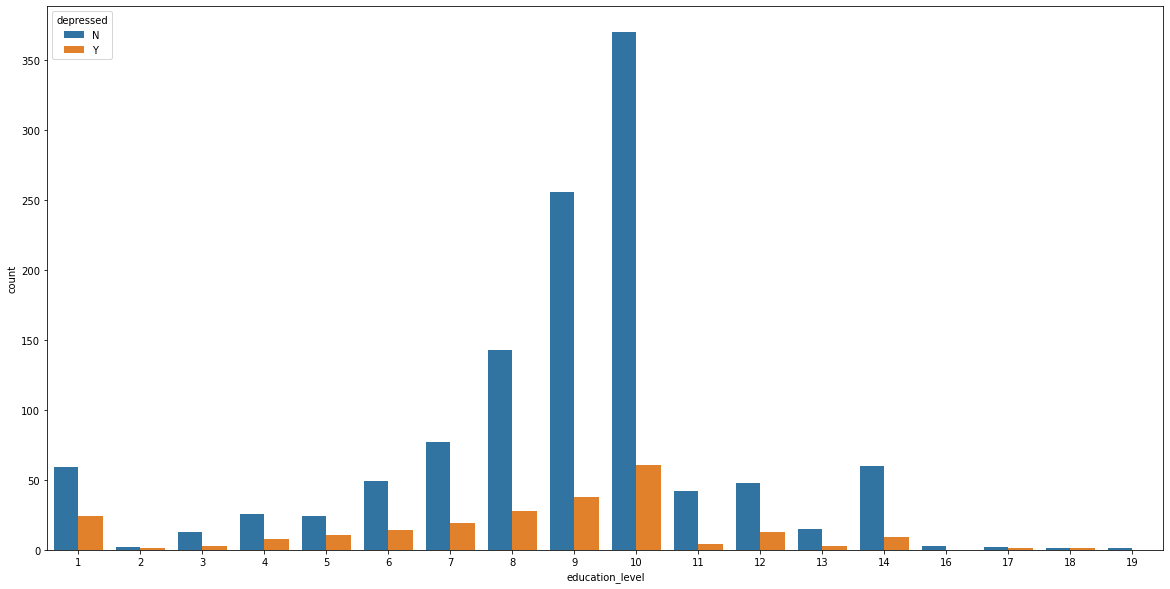

In [88]:
#level of education vs depression
plt.figure(figsize=(20, 10))
sns.countplot(x='education_level', hue='depressed', data=dep)

In [98]:
#percentage of depressed accross the level of education
percentage = []
for i in range(1,20):
    try:
        percentage.append(100*(len(dep[(dep['education_level'] == i) & (dep['depressed'] == 'Y')])/len(dep[(dep['education_level'] == i)])))
    except:
        percentage.append(0.0)
number = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen']

percentage_dict = zip(number, percentage)
percent = dict(percentage_dict)
percent

{'one': 28.915662650602407,
 'two': 33.33333333333333,
 'three': 18.75,
 'four': 23.52941176470588,
 'five': 31.428571428571427,
 'six': 22.22222222222222,
 'seven': 19.791666666666664,
 'eight': 16.374269005847953,
 'nine': 12.925170068027212,
 'ten': 14.153132250580047,
 'eleven': 8.695652173913043,
 'twelve': 21.311475409836063,
 'thirteen': 16.666666666666664,
 'fourteen': 13.043478260869565,
 'fifteen': 0.0,
 'sixteen': 0.0,
 'seventeen': 33.33333333333333,
 'eighteen': 50.0,
 'nineteen': 0.0}

In [110]:
#percentage of depression between different education level and gender
#female and depress
edu1_F = len(dep[ (dep['education_level'] == 1) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu2_F = len(dep[ (dep['education_level'] == 2) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu3_F = len(dep[ (dep['education_level'] == 3) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu4_F = len(dep[ (dep['education_level'] == 4) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu5_F = len(dep[ (dep['education_level'] == 5) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu6_F = len(dep[ (dep['education_level'] == 6) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu7_F = len(dep[ (dep['education_level'] == 7) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu8_F = len(dep[ (dep['education_level'] == 8) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu9_F = len(dep[ (dep['education_level'] == 9) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu10_F = len(dep[ (dep['education_level'] == 10) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu11_F = len(dep[ (dep['education_level'] == 11) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu12_F = len(dep[ (dep['education_level'] == 12) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu13_F = len(dep[ (dep['education_level'] == 13) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu14_F = len(dep[ (dep['education_level'] == 14) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu15_F = len(dep[ (dep['education_level'] == 15) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu16_F = len(dep[ (dep['education_level'] == 16) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu17_F = len(dep[ (dep['education_level'] == 17) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu18_F = len(dep[ (dep['education_level'] == 18) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])
edu19_F = len(dep[ (dep['education_level'] == 19) & (dep['depressed'] == 'Y') & (dep['sex'] == 'F') ][['depressed']])

In [111]:
#percentage of depression between different education level and gender
#female and depress
edu1_M = len(dep[ (dep['education_level'] == 1) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu2_M = len(dep[ (dep['education_level'] == 2) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu3_M = len(dep[ (dep['education_level'] == 3) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu4_M = len(dep[ (dep['education_level'] == 4) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu5_M = len(dep[ (dep['education_level'] == 5) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu6_M = len(dep[ (dep['education_level'] == 6) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu7_M = len(dep[ (dep['education_level'] == 7) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu8_M = len(dep[ (dep['education_level'] == 8) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu9_M = len(dep[ (dep['education_level'] == 9) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu10_M = len(dep[ (dep['education_level'] == 10) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu11_M = len(dep[ (dep['education_level'] == 11) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu12_M = len(dep[ (dep['education_level'] == 12) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu13_M = len(dep[ (dep['education_level'] == 13) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu14_M = len(dep[ (dep['education_level'] == 14) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu15_M = len(dep[ (dep['education_level'] == 15) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu16_M = len(dep[ (dep['education_level'] == 16) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu17_M = len(dep[ (dep['education_level'] == 17) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu18_M = len(dep[ (dep['education_level'] == 18) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])
edu19_M = len(dep[ (dep['education_level'] == 19) & (dep['depressed'] == 'Y') & (dep['sex'] == 'M') ][['depressed']])

In [113]:
edu_level_F = pd.DataFrame({"Group": ["1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"], "Numbers": [edu1_F, edu2_F, edu3_F,edu4_F,edu5_F,edu6_F,edu7_F,edu8_F,edu9_F,edu10_F,edu11_F,edu12_F,edu13_F,edu14_F,edu15_F,edu16_F,edu17_F,edu18_F,edu19_F]})
edu_level_M = pd.DataFrame({"Group": ["1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"], "Numbers": [edu1_M, edu2_M, edu3_M,edu4_M,edu5_M,edu6_M,edu7_M,edu8_M,edu9_M,edu10_M,edu11_M,edu12_M,edu13_M,edu14_M,edu15_M,edu16_M,edu17_M,edu18_M,edu19_M]})
z = int(edu_level_F['Numbers'].sum())
x = int(edu_level_M['Numbers'].sum())

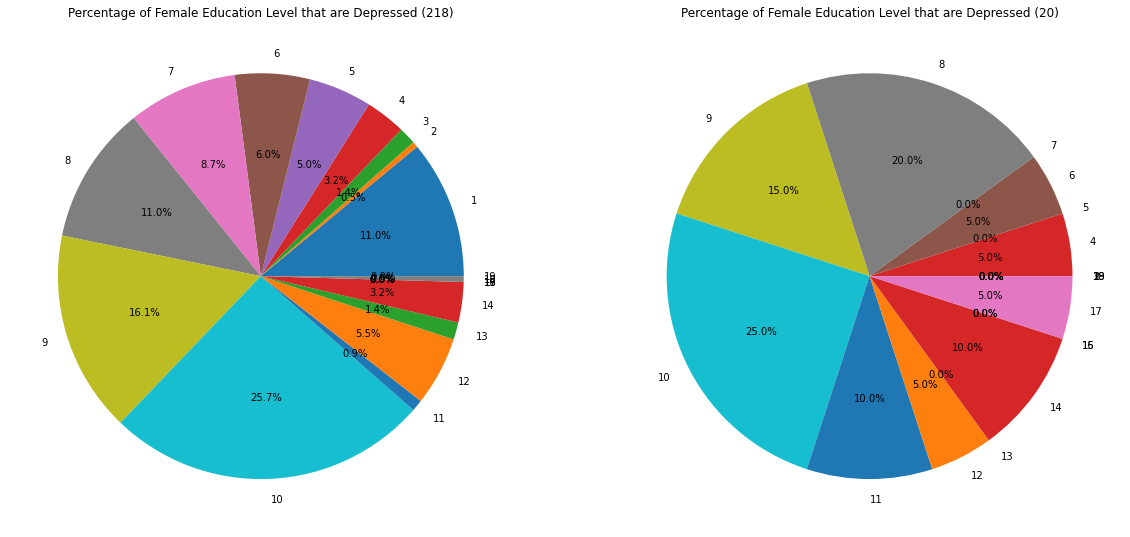

In [123]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.pie(edu_level_F['Numbers'],labels=edu_level_F['Group'],autopct='%1.1f%%')
plt.title('Percentage of Female Education Level that are Depressed ({})'.format(z))

plt.subplot(1,2,2)
plt.pie(edu_level_M['Numbers'],labels=edu_level_M['Group'],autopct='%1.1f%%')
plt.title('Percentage of Female Education Level that are Depressed ({})'.format(x))

plt.show()